# Features Selection

Features selection adalah salah satu proses yang penting pada ML, dimana dalam pemanfaatannya digunakan untuk memilih fitur apa saja yang bisa memberikan impact yang sangat besar bagi prediciton target sehingga dapat menghasilkan accuracy yang sangat bagus. Keuntungan dari features selection adalah :

- Mengurangi Overfitting
- Meningkatkan skor akurasi
- Mengurangi waktu training data

Beberepa teknik yang digunakan dalam features selection :

- Univariate selection
- Feature importance
- Correlation matrix with heatmap

In [8]:
import pandas as pd

In [9]:
df = pd.read_csv('../../../datasets/melb_data.csv/melb_data.csv')

In [10]:
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


In [12]:
df = df.dropna()

In [22]:
df.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')

## Univariate Selection

In [18]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [58]:
X = df[['Rooms', 'Distance', 'Bedroom2', 'Bathroom', 'Car', 'Landsize', 'BuildingArea',
        'YearBuilt', 'Longtitude', 'Propertycount']]
y = df['Price']

In [60]:
best_features = SelectKBest(score_func=chi2, k=10)
fit = best_features.fit(X, y)
pd_scores = pd.DataFrame(fit.scores_)
pd_columns = pd.DataFrame(X.columns)

features_scores = pd.concat([pd_columns, pd_scores], axis=1)
features_scores.columns = ['Feature', 'Score']
pd.options.display.float_format = '{:.2f}'.format # Mengubah menjadi angka float
print(features_scores.nlargest(10, 'Score')) # Mencetak features_scores dengan sorting score desc

         Feature      Score
9  Propertycount 3896481.18
5       Landsize 2467587.15
6   BuildingArea  219285.63
1       Distance    5514.11
7      YearBuilt    1614.32
4            Car    1076.50
0          Rooms    1059.17
2       Bedroom2    1017.80
3       Bathroom     922.17
8     Longtitude       0.13


## Feature Importance

In [61]:
import matplotlib.pyplot as plt
from sklearn.ensemble import ExtraTreesClassifier

In [64]:
X = df[['Rooms', 'Distance', 'Bedroom2', 'Bathroom', 'Car', 'Landsize', 'BuildingArea',
        'YearBuilt', 'Lattitude', 'Longtitude', 'Propertycount']]
y = df['Price']

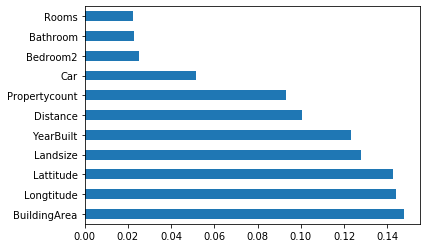

In [65]:
model = ExtraTreesClassifier(n_estimators=20)
model.fit(X, y)

features = pd.Series(model.feature_importances_, index=X.columns)

features.nlargest(11).plot(kind='barh')
plt.show()

## Correlation Matrix with Heatmap

In [67]:
X = df[['Rooms', 'Distance', 'Bedroom2', 'Bathroom', 'Car', 'Landsize', 'BuildingArea',
        'YearBuilt', 'Lattitude', 'Longtitude', 'Propertycount']]
y = df['Price']

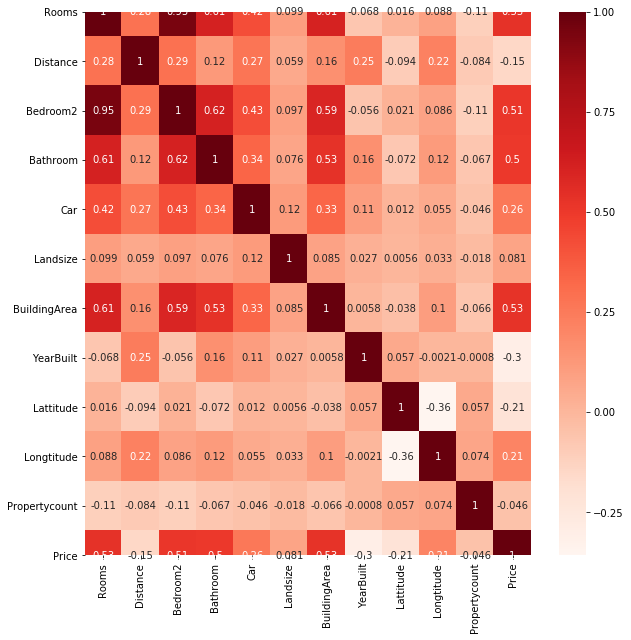

In [80]:
df = pd.concat([X, y], axis=1)

correlation_matrix = df.corr()
features = correlation_matrix.index
plt.figure(figsize=(10, 10))
sns.heatmap(correlation_matrix, annot=True, cmap=plt.cm.Reds)
plt.show()